In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Importing train and test dataset

In [223]:
df_train = pd.read_csv('train.csv', index_col= 0)
df_test = pd.read_csv('test.csv', index_col= 0)

## Data Infos

In [224]:
df_train.shape

(103904, 24)

In [225]:
df_train.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [226]:
df_train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

## Substituindo Valores não numéricos por numéricos

In [227]:
label_encoder = LabelEncoder()

colunas = df_train.columns
for column in colunas:
  if df_train[column].dtypes != 'int64' and df_train[column].dtypes != 'float64':
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.fit_transform(df_test[column])

df_train.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,0,1,23,0,1,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,1,0,49,0,0,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,1,1,30,0,0,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,0,1,22,0,1,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0
103903,62567,1,0,27,0,0,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,0


## Tirando NaN

In [228]:
df_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Dado o significado da coluna em que há NaN presente, substitui-se os valores NaN por 0 para indicar que não houve atraso

In [229]:
df_train.fillna(0, inplace= True)
df_test.fillna(0, inplace= True)

df_train.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,0,1,23,0,1,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,1,0,49,0,0,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,1,1,30,0,0,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,0,1,22,0,1,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0
103903,62567,1,0,27,0,0,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,0


In [230]:
def MinMaxScale(x, min, max):
    return (x- min) / (max - min)

maxs = df_train.max()
mins = df_train.min()

for column in df_train:
    df_train[column] = MinMaxScale(df_train[column], mins[column], maxs[column])
    df_test[column] = MinMaxScale(df_test[column], mins[column], maxs[column])

In [231]:
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.540280,1.0,0.0,0.076923,1.0,1.0,0.086632,0.6,0.8,0.6,...,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0
1,0.038852,1.0,1.0,0.230769,0.0,0.0,0.041195,0.6,0.4,0.6,...,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0
2,0.847150,0.0,0.0,0.243590,0.0,0.0,0.224354,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0
3,0.184980,0.0,0.0,0.230769,0.0,0.0,0.107229,0.4,1.0,1.0,...,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0
4,0.918532,1.0,0.0,0.692308,0.0,0.0,0.036955,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0


## Finalizando o dataset e criando os targets

id não é uma informação relevante para interferir na satisfação do cliente

In [232]:
df_train = df_train.drop('id', axis= 1)
df_test = df_test.drop('id', axis= 1)

df_train_target = df_train['satisfaction']
df_test_target = df_test['satisfaction']
df_train = df_train.drop('satisfaction', axis= 1)
df_test = df_test.drop('satisfaction', axis= 1)

df_test.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
25971,1.0,1.0,0.346154,0.0,0.0,0.099960,0.6,0.6,0.6,0.2,...,0.8,0.8,0.6,0.4,0.75,0.8,1.0,0.8,0.0,0.0
25972,1.0,0.0,0.205128,0.0,0.0,0.124192,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,1.0,1.00,1.0,1.0,0.8,0.0,0.0
25973,0.0,0.0,0.128205,1.0,0.5,0.160945,0.4,1.0,0.2,1.0,...,0.4,0.4,0.8,0.6,0.75,1.0,0.8,0.4,0.0,0.0
25974,1.0,0.0,0.089744,0.0,0.0,0.221325,0.6,0.6,0.6,0.6,...,0.8,0.8,0.6,0.4,1.00,0.8,1.0,0.8,0.0,0.0
25975,0.0,0.0,0.448718,1.0,0.5,0.047052,0.4,1.0,0.4,1.0,...,0.4,0.2,0.2,0.4,0.00,0.2,0.2,0.2,0.0,0.0


## Train, Test and Split

In [233]:
X_train, X_target, Y_train, Y_target = train_test_split(df_train, df_train_target, test_size=0.2, random_state= 42)

## Creating the Model

In [234]:
KNN = KNeighborsClassifier(n_neighbors= 5)
KNN.fit(X_train, Y_train)
result = KNN.predict(X_target)

## Evaluating the Model

In [235]:
accuracy_score(result, Y_target) * 100

92.90698233963717

Text(113.9222222222222, 0.5, 'Predicted')

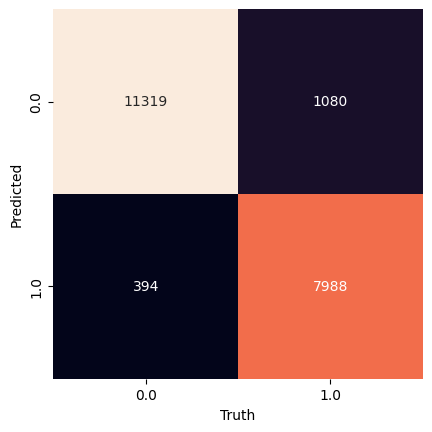

In [236]:
mat = confusion_matrix(result, Y_target)
names = np.unique(result)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

## Comparing with test.csv

In [237]:
Y_pred = KNN.predict(df_test)

In [238]:
accuracy_score(Y_pred, df_test_target) * 100

92.99738219895288

Text(113.9222222222222, 0.5, 'Predicted')

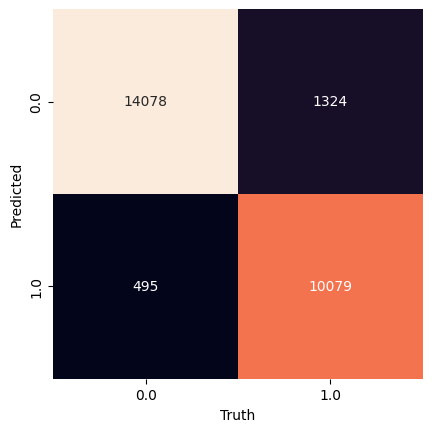

In [239]:
mat = confusion_matrix(Y_pred, df_test_target)
names = np.unique(Y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')